In [22]:
import numpy as np
import pandas as pd

In [ ]:
# NBA Full dataset

In [202]:
# Height
nba_adv=pd.read_csv('nba_players_adv.csv',encoding='ISO-8859-1')

nba_adv['Player']=nba_adv['Player'].apply(lambda x: x.upper())

nba_adv['id']=nba_adv['Player']+nba_adv['year']

nba=nba_adv[['Player','id','year']]

height=pd.read_csv('height.csv')

height['names']=height['names'].apply(lambda x: x.upper())

nba=nba.merge(height,left_on='Player',right_on='names')

nba.drop(columns=['names','link'],inplace=True)

In [203]:
nba.drop_duplicates(subset='id',inplace=True)

In [204]:
# OR% , DR%, AST%, STL%, BLK%, TOV%, USG%, PER, FTr - adv DONE (Not for Euroleague)
nba_adv_to_merge=nba_adv[['id','MP','ORB%','DRB%','AST%','STL%','BLK%', 'TOV%','USG%', 'PER','FTr']]

nba_adv_to_merge.fillna(0,inplace=True)

nba=nba.merge(nba_adv_to_merge,left_on='id',right_on='id',how='left')

C:\Users\marli\AppData\Local\Temp\ipykernel_23736\3859739667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_adv_to_merge.fillna(0,inplace=True)


In [205]:
#Pp100, FGA100, FT%, 2FG%, 3FG%, 3FGA%
nba_basic_100=pd.read_csv('nba_players_basic_per_100.csv',encoding='ISO-8859-1')

nba_basic_100['Player']=nba_basic_100['Player'].apply(lambda x: x.upper())

nba_basic_100['id']=nba_basic_100['Player']+nba_basic_100['year']

nba_basic_100['3FGA%']=nba_basic_100['3PA']/nba_basic_100['FGA']

nba_basic_100['3FGA%']=nba_basic_100['3FGA%'].fillna(0)

nba_basic_100_to_merge=nba_basic_100[['id','PTSper100','FGAper100','FT%','2P%','3P%','3FGA%','3PA','FGA']]

nba=nba.merge(nba_basic_100_to_merge,left_on='id',right_on='id')

In [206]:
nba_shooting=pd.read_csv('nba_players_shooting.csv')

nba_shooting['Player']=nba_shooting['Player'].apply(lambda x: x.upper())

nba_shooting['id']=nba_shooting['Player']+nba_shooting['year']

nba_shooting_to_merge=nba_shooting[['id','Dist.', '0-3', '3-10', '10-16', '16-3P','2P.2','3P.2','%3PA']]

nba_shooting_to_merge.rename(columns={'Dist.':'Avg Dist','0-3':'0-3ft FGA%','3-10':'3-10ft FGA%','10-16':'10-16ft FGA%','3P.2':'% of Ast 3s','2P.2':'% of Ast 2s','%3PA':'% Corner 3s'},inplace=True)

nba=nba.merge(nba_shooting_to_merge,left_on='id',right_on='id')

C:\Users\marli\AppData\Local\Temp\ipykernel_23736\1844106091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_shooting_to_merge.rename(columns={'Dist.':'Avg Dist','0-3':'0-3ft FGA%','3-10':'3-10ft FGA%','10-16':'10-16ft FGA%','3P.2':'% of Ast 3s','2P.2':'% of Ast 2s','%3PA':'% Corner 3s'},inplace=True)


In [207]:
nba.fillna(0,inplace=True)

In [208]:
nba['number of corner 3s']=nba['% Corner 3s']*nba['3PA']
nba['% Corner 3s']=nba['number of corner 3s']/nba['FGA']

nba.drop(columns=['number of corner 3s','FGA','3PA'],inplace=True)

In [209]:
nba_to_clust=nba[nba['MP']>=100].copy()
nba_to_clust.drop(columns='MP',inplace=True)

In [210]:
nba_to_clust.reset_index(drop=True,inplace=True)

In [211]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [212]:
features = ['height', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'PER','FTr', 'PTSper100', 'FGAper100', 'FT%', '2P%', '3P%', '3FGA%','Avg Dist', '0-3ft FGA%','3-10ft FGA%', '10-16ft FGA%', '16-3P','% of Ast 2s', '% of Ast 3s', '% Corner 3s']
# Separating out the features
x = nba_to_clust.loc[:, features]
# Separating out the target
y = nba_to_clust.loc[:,['id']]

In [213]:
trans = MinMaxScaler(feature_range=(-1, 1))
nba_scaled = trans.fit_transform(x)

In [214]:
nba_scaled=pd.DataFrame(nba_scaled,columns=features)

In [215]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(nba_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [216]:
nba_scaled=pd.concat([y,nba_scaled],axis=1)

In [217]:
nba_pca=pd.concat([principalDf, y], axis = 1)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

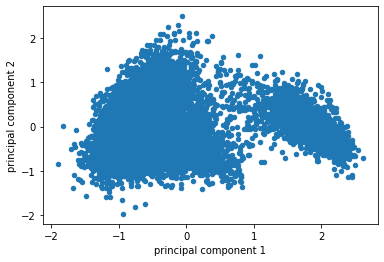

In [218]:
nba_pca.plot.scatter(x='principal component 1',y='principal component 2')

In [219]:
pca.explained_variance_ratio_

array([0.44501779, 0.13859341])

In [220]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

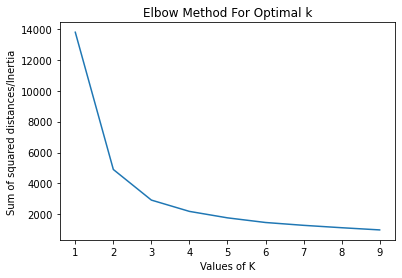

In [221]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(nba_pca[['principal component 1','principal component 2']])
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

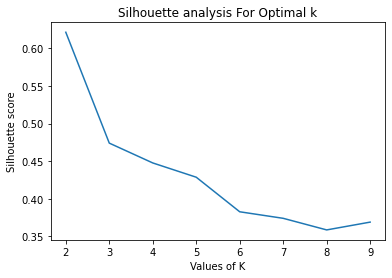

In [222]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(nba_pca[['principal component 1','principal component 2']])
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(nba_pca[['principal component 1','principal component 2']], cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [223]:
kmeans = KMeans(init="random",n_clusters=3,max_iter=300, random_state=42)
kmeans.fit(nba_pca[['principal component 1','principal component 2']])

KMeans(init='random', n_clusters=3, random_state=42)

In [224]:
nba_pca['cluster']=pd.DataFrame(kmeans.labels_)

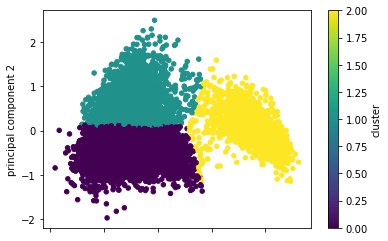

In [225]:
ax2 = nba_pca.plot.scatter(x='principal component 1',y='principal component 2',c='cluster',colormap='viridis')

In [226]:
nba_to_clust['cluster']=pd.DataFrame(kmeans.labels_)

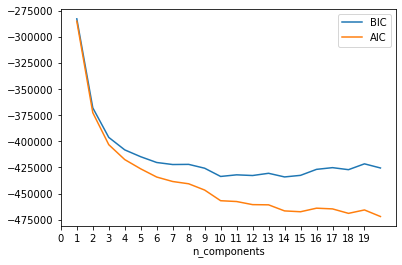

In [227]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(nba_scaled.loc[:,'height':])
          for n in n_components]

plt.plot(n_components, [m.bic(nba_scaled.loc[:,'height':]) for m in models], label='BIC')
plt.plot(n_components, [m.aic(nba_scaled.loc[:,'height':]) for m in models], label='AIC')
plt.legend(loc='best')
plt.xticks(np.arange(0, 20, step=1))
plt.xlabel('n_components');

In [229]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
gmm.fit(nba_scaled.loc[:,'height':])

#predictions from gmm
labels = gmm.predict(nba_scaled.loc[:,'height':])
frame = pd.DataFrame(nba_scaled.loc[:,'height':])
frame['cluster'] = labels
frame.columns = ['height', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'PER','FTr', 'PTSper100', 'FGAper100', 'FT%', '2P%', '3P%', '3FGA%','Avg Dist', '0-3ft FGA%','3-10ft FGA%', '10-16ft FGA%', '16-3P','% of Ast 2s', '% of Ast 3s', '% Corner 3s','cluster']

In [230]:
nba_scaled['cluster']=frame['cluster']
nba_to_clust['cluster']=frame['cluster']

In [231]:
nba=nba.merge(nba_to_clust[['id','cluster']],left_on='id',right_on='id',how='left')

In [232]:
nba_scaled.to_csv('nba_clusters_full.csv',index=False)